In [1]:
from IPython.display import display, Image
from pprint import pprint
from itertools import chain

from sympy import Function, Symbol, symbols
import pyx

from ginv import *
sympy.init_printing()

In [2]:
Monom.cmp = Monom.POTlex

In [3]:
h, tau, nu = sympy.symbols('h, tau, nu', real=True)

In [4]:
var = 'j, k'.split(', ')
fun = 'ux, uy, u'.split(', ')
Monom.init(var, fun)
T = PolySchem.T
var, fun = PolySchem.init()
j, k = var
ux, uy, u = fun

In [5]:
(T(u, j, 2) - T(ux))/(2*h)

[[[0;0 0], -1/(2*h)], [[2;2 0], 1/(2*h)]]

Запишем уравнение Лапласа $u_{xx}+u_{yy}=0$ в дивергентной форме, где
\begin{eqnarray*}
 \oint \limits_{\Gamma} \!- u_y dx + u_x dy = 0
  \label{ch4.1:yyy1}
\end{eqnarray*}
для любого замкнутого контура $\Gamma$. Для перехода к дискретной
формулировке сопоставим $u(x, y) = u(x_j,y_k)$ и выберем в качестве
базового объема контур показанный на рис

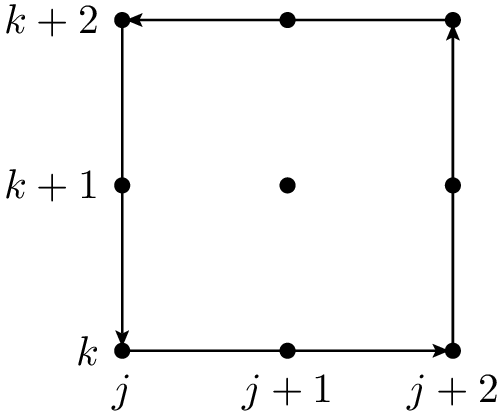

In [6]:
Image("./stencil2D3x3y.png", width=250)

In [7]:
laplace = Forest(Janet)
res = ginvMin((
T(ux, j)*2*h - (T(u, j, 2) - T(u)),\
T(uy, k)*2*h - (T(u, k, 2) - T(u)),\
-(T(uy, j) - T(uy, j, k, 2))*2*h +\
 (T(ux, j, 2, k) - T(ux, k))*2*h), \
laplace, level=1)
print(f"crit1: {res[1]}")
print(f"crit2: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {laplace.count()}")
print(f"reduction: {laplace.reduction()}")
print(f"       HP: {laplace.HP()}")

prolong <= uy*k
T(uy, k)
prolong <= ux*j
T(ux, j)
prolong <= ux*j**2*k
ux*j**2*k
T(ux, k)
prolongAll
ux*j*k
T(uy, j, 2)
prolongAll
T(uy, j, k)
prolongAll
uy*j**2*k
T(u, j, 4, k, 2)
prolongAll
crit1: 0
crit2: 0
 time: 0.03 sec
    count: 6
reduction: 7
       HP: 6s - 6


In [8]:
for w in laplace.GB():
    print(w.poly)

T(ux, k)*(-2*h) + T(uy, j)*(-2*h) + T(u, j, 3, k) + T(u, j, k, 3) + T(u, j, k)*(-2)
T(ux, j)*2*h + T(u, j, 2)*(-1) + T(u)
T(uy, k)*2*h + T(u, k, 2)*(-1) + T(u)
T(uy, j, 2)*(-2*h) + T(u, j, 4, k) + T(u, j, 2, k, 3) + T(u, j, 2, k)*(-3) + T(u, k)
T(u, j, 4, k, 2)*(-1) + T(u, j, 2, k, 4)*(-1) + T(u, j, 2, k, 2)*4 + T(u, j, 2)*(-1) + T(u, k, 2)*(-1)


In [9]:
for w in laplace[-1].GB():
    print(w.poly)

T(u, j, 4, k, 2)*(-1) + T(u, j, 2, k, 4)*(-1) + T(u, j, 2, k, 2)*4 + T(u, j, 2)*(-1) + T(u, k, 2)*(-1)


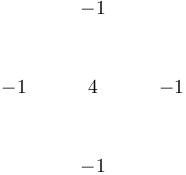

In [10]:
for w in laplace[-1].GB():
    display(sum(Symbol(m.T_latex())*c for m, c in w.poly))
    
    frm, l = [pyx.text.halign.boxcenter, pyx.text.valign.top], 1.
    pyx.unit.set(wscale=1)
    canvas = pyx.canvas.canvas()
    for m, c in w.poly:
        canvas.text(m[0]*l, m[1]*l, fr"\Large${c}$", frm)
    display(canvas)

In [11]:
laplace = Forest(Janet)
res = ginvMin((
(T(ux, j) + T(ux))/2*h - (T(u, j) - T(u)),\
(T(uy, k) + T(uy))/2*h - (T(u, k) - T(u)),\
-(T(uy, j) - T(uy, j, k, 2))*2*h +\
 (T(ux, j, 2, k) - T(ux, k))*2*h), \
laplace, level=1)
print(f"crit1: {res[1]}")
print(f"crit2: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {laplace.count()}")
print(f"reduction: {laplace.reduction()}")
print(f"       HP: {laplace.HP()}")

prolong <= uy*k
T(uy, k)
prolong <= ux*j
T(ux, j)
prolong <= ux*j**2*k
ux*j**2*k
T(u, j, 2, k)
prolongAll
crit1: 0
crit2: 0
 time: 0.01 sec
    count: 3
reduction: 5
       HP: 5s + 2


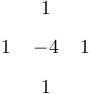

In [12]:
for w in laplace[-1].GB():
    display(sum(Symbol(m.T_latex())*c for m, c in w.poly))
    
    frm, l = [pyx.text.halign.boxcenter, pyx.text.valign.top], 1.
    pyx.unit.set(wscale=1)
    canvas = pyx.canvas.canvas()
    for m, c in w.poly:
        canvas.text(m[0]*l, m[1]*l, fr"\Large${c}$", frm)
    display(canvas)

В результате последнее из уравнений является искомой
разностной схемой записанной в одинарных узлах
\begin{eqnarray*}
 \frac{u_{j+1 \, k} - 2 u_{j \, k} + u_{j - 1 \, k}}{4
h^2}
 +\frac{u_{j \, k+1} - 2 u_{j \, k} + u_{j \, k-1}}{4
h^2}=0.
 \end{eqnarray*}

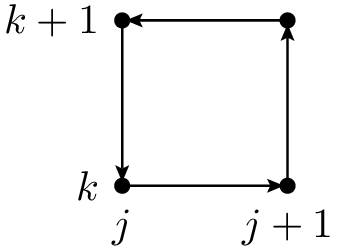

In [13]:
Image("./stencil2D2x2y.png", width=200)

In [14]:
laplace = Forest(Janet)
res = ginvMin((
T(ux, j)*2*h - (T(u, j, 2) - T(u)),\
T(uy, k)*2*h - (T(u, k, 2) - T(u)),\
-((T(uy) + T(uy, j))/2 - (T(uy, j, k) + T(uy, k))/2)*h +\
 ((T(ux, j) + T(ux, j, k))/2 - (T(ux, k) + T(ux))/2)*h), \
laplace, level=1)
print(f"crit1: {res[1]}")
print(f"crit2: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {laplace.count()}")
print(f"reduction: {laplace.reduction()}")
print(f"       HP: {laplace.HP()}")

prolong <= uy*k
T(uy, k)
prolong <= ux*j
T(ux, j)
prolong <= ux*j*k
ux*j*k
T(ux, k)
prolongAll
ux*j*k
T(uy, j, 2)
prolongAll
T(uy, j, k)
prolongAll
uy*j**2*k
T(u, j, 3, k, 2)
prolongAll
crit1: 0
crit2: 0
 time: 0.03 sec
    count: 6
reduction: 11
       HP: 5s - 2


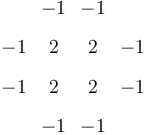

In [15]:
for w in laplace[-1].GB():
    display(sum(Symbol(m.T_latex())*c for m, c in w.poly))
    
    frm, l = [pyx.text.halign.boxcenter, pyx.text.valign.top], 1.
    pyx.unit.set(wscale=1)
    canvas = pyx.canvas.canvas()
    for m, c in w.poly:
        canvas.text(m[0]*l, m[1]*l, fr"\Large${c}$", frm)
    display(canvas)

In [16]:
laplace = Forest(Janet)
res = ginvMin((
(T(ux, j) + T(ux))/2*h - (T(u, j) - T(u)),\
(T(uy, k) + T(uy))/2*h - (T(u, k) - T(u)),\
-((T(uy) + T(uy, j))/2 - (T(uy, j, k) + T(uy, k))/2)*h +\
 ((T(ux, j) + T(ux, j, k))/2 - (T(ux, k) + T(ux))/2)*h), \
laplace, level=1)
print(f"crit1: {res[1]}")
print(f"crit2: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {laplace.count()}")
print(f"reduction: {laplace.reduction()}")
print(f"       HP: {laplace.HP()}")

prolong <= uy*k
T(uy, k)
prolong <= ux*j
T(ux, j)
prolong <= ux*j*k
ux*j*k
T(ux, k)
prolongAll
ux*j*k
T(uy, j, 2)
prolongAll
T(uy, j, k)
prolongAll
uy*j**2*k
T(u, j, 2, k, 2)
prolongAll
crit1: 0
crit2: 0
 time: 0.06 sec
    count: 6
reduction: 14
       HP: 4s + 1


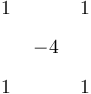

In [18]:
for w in laplace[-1].GB():
    display(sum(Symbol(m.T_latex())*c for m, c in w.poly))
    
    frm, l = [pyx.text.halign.boxcenter, pyx.text.valign.top], 1.
    pyx.unit.set(wscale=1)
    canvas = pyx.canvas.canvas()
    for m, c in w.poly:
        canvas.text(m[0]*l, m[1]*l, fr"\Large${c}$", frm)
    display(canvas)

на примере уравнения Бюргерса
\begin{equation}
  u_t + f_x = \nu\ u_{xx}, \quad \nu = \mathrm{const}
\end{equation}

## Генерация схем типа Лакса
Применяя интегральное представление, представим
уравнение в виде следующей системы
\begin{equation}
  \left\{
  \begin{array}{rcl}
    u_t + f_x &=& \nu\ u_{xx} \\
    \displaystyle\int^{\tau_2}_{\tau_1}u_t\,dt &=& u\Bigr\vert^{t=\tau_2}_{t=\tau_1} \\
    \displaystyle\int^{h_2}_{h_1} f_x\,dx      &=& f\Bigr\vert^{x=h_2}_{x=h_1}\\
    \displaystyle\int^{h_2}_{h_1} u_x\,dx      &=& u\Bigr\vert^{x=h_2}_{x=h_1}\\
    \displaystyle\int^{h_2}_{h_1} u_{xx}\,dx   &=& u_x\Bigr\vert^{x=h_2}_{x=h_1}.
  \end{array}
  \right.
\end{equation}
Задавая в качестве метода интегрирования квадратурную
формулу прямоугольников со средней точкой по переменной $x$
и явную формулу интегрирования по переменной $t$, получим следующую
систему разностных соотношений для системы
\begin{equation}
  \left\{
  \begin{array}{rcl}
    {u_t\,}^{n}_{j} + {f_x\,}^{n}_{j} &=& \nu\ {u_{xx}\,}^{n}_{j} \\
    {u_t\,}^{n}_{j}\,\tau &=& u^{n+1}_{j} - \mathbf{u^{n}_{j}} \\
    2{f_x\,}^{n}_{j+1}\,h &=& f^{n}_{j+2} - f^{n}_{j} \\
    2{u_x\,}^{n}_{j+1}\,h &=& u^{n}_{j+2} - u^{n}_{j} \\
    2{u_{xx}\,}^{n}_{j+1}\,h &=& {u_x\,}^{n}_{j+2} - {u_x\,}^{n}_{j}.
  \end{array}
  \right.
\end{equation}
Здесь $h=h_2-h_1$, $\tau=\tau_2-\tau_1$ -- шаги по переменным $x$ и $t$,
а $n,\ j$ номера узлов сетки по $x$ и $t$ соответственно. Заменяя
во втором уравнении в системе значение $u$ с предыдущего
временного слоя средним значением соседних точек по оси $x$, получим систему
разностных соотношений для вывода схемы типа Лакса
\begin{equation}
  \left\{
  \begin{array}{rcl}
    {u_t\,}^{n}_{j} + {f_x\,}^{n}_{j} &=& \nu\ {u_{xx}\,}^{n}_{j} \\
    {u_t\,}^{n}_{j}\,\tau &=& u^{n+1}_{j} - \mathbf{\frac{u^{n}_{j+2} + u^{n}_{j}}{2}} \\
    2{f_x\,}^{n}_{j+1}\,h &=& f^{n}_{j+2} - f^{n}_{j} \\
    2{u_x\,}^{n}_{j+1}\,h &=& u^{n}_{j+2} - u^{n}_{j} \\
    2{u_{xx}\,}^{n}_{j+1}\,h &=& {u_x\,}^{n}_{j+2} - {u_x\,}^{n}_{j}.
  \end{array}
  \right.
\end{equation}

In [19]:
var = 'n, j'.split(', ')
fun = 'uxx, ux, ut, fx, u, f'.split(', ')
Monom.init(var, fun)
T = PolySchem.T
var, fun = PolySchem.init()
n, j = var
uxx, ux, ut, fx, u, f = fun

In [20]:
burgers = Forest(Janet)
res = ginvMin((
T(ut) + T(fx) - nu*T(uxx),\
T(ut, j) - (T(u, n, j) - (T(u, j, 2) + T(u))/2)/tau,\
T(fx, j)*2*h - (T(f, j, 2) - T(f)),\
T(ux, j)*2*h - (T(u, j, 2) - T(u)),\
T(uxx, j)*2*h - (T(ux, j, 2) - T(ux))),\
burgers, level=1)
print(f"crit1: {res[1]}")
print(f"crit2: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {burgers.count()}")
print(f"reduction: {burgers.reduction()}")
print(f"       HP: {burgers.HP()}")

prolong <= fx*j
T(fx, j)
prolong <= ut*j
T(ut, j)
prolong <= ux*j
T(ux, j)
prolong <= uxx
T(uxx)
prolong <= uxx*j
uxx*j
T(ux)
prolong <= ux*j
ux*j
T(u, n, j, 2)
prolongAll
crit1: 0
crit2: 0
 time: 0.04 sec
    count: 5
reduction: 7
       HP: s^2/2 + 13s/2 + 3


In [21]:
for w in burgers:
    print(w.poly)

T(uxx)*(-nu) + T(ut) + T(fx)
T(ux)*(-2*h*nu) + T(u, n, j)*(-4*h**2/tau) + T(u, j, 3)*nu + T(u, j, 2)*2*h**2/tau + T(u, j)*(-nu) + T(u)*2*h**2/tau + T(f, j, 2)*(-2*h) + T(f)*2*h
T(ut, j) + T(u, n, j)*(-1/tau) + T(u, j, 2)*1/(2*tau) + T(u)*1/(2*tau)
T(fx, j)*2*h + T(f, j, 2)*(-1) + T(f)
T(u, n, j, 2)*4*h**2/tau + T(u, j, 4)*(-nu) + T(u, j, 3)*(-2*h**2/tau) + T(u, j, 2)*2*nu + T(u, j)*(-2*h**2/tau) + T(u)*(-nu) + T(f, j, 3)*2*h + T(f, j)*(-2*h)


\begin{equation}
  \frac{2u^{n+1}_{j+2} - (u^{n}_{j+3} + u^{n}_{j+1})}{2\tau}
    + \frac{f^{n}_{j+3} - f^{n}_{j+1}}{2h} = \nu\frac{u^{n}_{j+4}-2u^{n}_{j+2}+u^{n}_{j}}{4h^2}
\end{equation}

T(u, n, j, 2)*1/tau + T(u, j, 4)*(-nu/(4*h**2)) + T(u, j, 3)*(-1/(2*tau)) + T(u, j, 2)*nu/(2*h**2) + T(u, j)*(-1/(2*tau)) + T(u)*(-nu/(4*h**2)) + T(f, j, 3)*1/(2*h) + T(f, j)*(-1/(2*h))


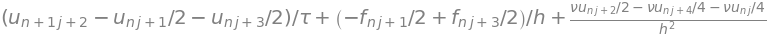

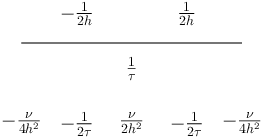

In [22]:
for w in burgers[-2].GB():
    print(w.poly/(4*h**2))
    display((sum(Symbol(m.T_latex())*c for m, c in w.poly)/(4*h**2)).expand().collect([tau, h]))
    
    frm, l = [pyx.text.halign.boxcenter, pyx.text.valign.top], 1.4
    pyx.unit.set(wscale=1)
    pyx.text.set(pyx.text.LatexEngine)

    canvas = pyx.canvas.canvas()
    for m, c in w.poly:
        if m.position() == 4:
            canvas.text(m[1]*l, m[0]*l, fr"\Large${sympy.latex(sympy.cancel(c/(4*h**2)))}$", frm)
        if m.position() == 5:
            canvas.text(m[1]*l, m[0]*l+2*l, fr"\Large${sympy.latex(c/(4*h**2))}$", frm)
    canvas.stroke(pyx.path.line(0, l*1.25, 4*l, l*1.25))
    display(canvas)

In [23]:
var = 'n, j'.split(', ')
fun = 'uxxx, uxx, ux, ut, fx, u, f'.split(', ')
Monom.init(var, fun)
T = PolySchem.T
var, fun = PolySchem.init()
n, j = var
uxxx, uxx, ux, ut, fx, u, f = fun

In [24]:
KDV = Forest(Janet)
res = ginvMin((
T(ut) + T(fx) + T(uxxx),\
T(ut, j) - (T(u, n, j) - (T(u, j, 2) + T(u))/2)/tau,\
T(fx, j)*2*h - (T(f, j, 2) - T(f)),\
T(ux, j)*2*h - (T(u, j, 2) - T(u)),\
T(uxx, j)*2*h - (T(ux, j, 2) - T(ux)),\
T(uxxx, j)*2*h - (T(uxx, j, 2) - T(uxx))),\
KDV, level=1)
print(f"crit1: {res[1]}")
print(f"crit2: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {KDV.count()}")
print(f"reduction: {KDV.reduction()}")
print(f"       HP: {KDV.HP()}")

prolong <= fx*j
T(fx, j)
prolong <= ut*j
T(ut, j)
prolong <= ux*j
T(ux, j)
prolong <= uxx*j
T(uxx, j)
prolong <= uxxx
T(uxxx)
prolong <= uxxx*j
uxxx*j
T(uxx)
prolong <= uxx*j
uxx*j
T(ux)
prolong <= ux*j
ux*j
T(u, n, j, 3)
prolongAll
crit1: 0
crit2: 0
 time: 0.05 sec
    count: 6
reduction: 11
       HP: s^2/2 + 15s/2 + 1


In [24]:
for w in KDV[-2].GB():
    print(w.poly/(8*h**3))

T(u, n, j, 3)*(-1/tau) + T(u, j, 6)*(-1/(8*h**3)) + T(u, j, 4)*((4*h**3/tau + 3)/(8*h**3)) + T(u, j, 3)*1/(2*tau) + T(u, j, 2)*(-3/(8*h**3)) + T(u)*1/(8*h**3) + T(f, j, 4)*(-1/(2*h)) + T(f, j, 2)*1/(2*h)


T(u, n, j, 3)*(-1/tau) + T(u, j, 6)*(-1/(8*h**3)) + T(u, j, 4)*((4*h**3/tau + 3)/(8*h**3)) + T(u, j, 2)*((4*h**3/tau - 3)/(8*h**3)) + T(u)*1/(8*h**3) + T(f, j, 4)*(-1/(2*h)) + T(f, j, 2)*1/(2*h)


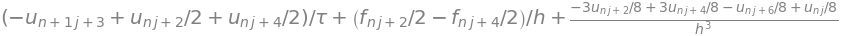

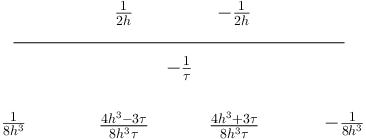

In [29]:
for w in KDV[-2].GB():
    print(w.poly/(8*h**3))
    display((sum(Symbol(m.T_latex())*c for m, c in w.poly)/(8*h**3)).expand().collect([tau, h]))
    
    frm, l = [pyx.text.halign.boxcenter, pyx.text.valign.top], 1.4
    pyx.unit.set(wscale=1)
    pyx.text.set(pyx.text.LatexEngine)

    canvas = pyx.canvas.canvas()
    for m, c in w.poly:
        if m.position() == 5:
            canvas.text(m[1]*l, m[0]*l, fr"\Large${sympy.latex(sympy.cancel(c/(8*h**3)))}$", frm)
        if m.position() == 6:
            canvas.text(m[1]*l, m[0]*l+2*l, fr"\Large${sympy.latex(sympy.cancel(c/(8*h**3)))}$", frm)
    canvas.stroke(pyx.path.line(0, l*1.25, 6*l, l*1.25))
    display(canvas)